In [8]:
!pip install pygame pyvirtualdisplay



In [14]:
!apt-get install -y xvfb


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 12.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

pygame 2.6.1 (SDL 2.28.4, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


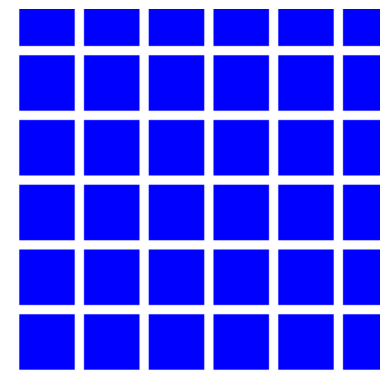


🎯 1/10 - Erase (1-36), 0 = Surprise! 🎲
 ▶ 

❌ Invalid. Try again.


🎯 2/10 - Erase (1-36), 0 = Surprise! 🎲
 ▶ 30


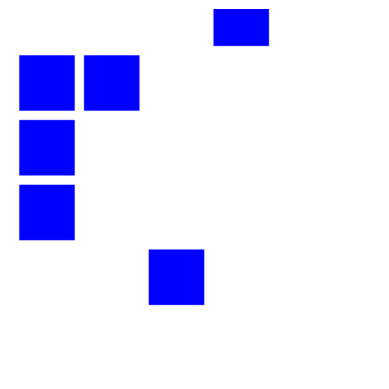




🎯 3/10 - Erase (1-6), 0 = Surprise! 🎲
 ▶ 6


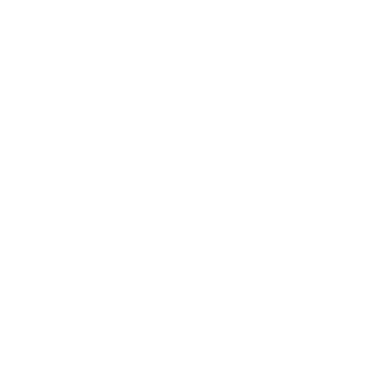




🎉 Congrats! All boxes erased! YOU WIN! 🏆



In [1]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
import random
from pyvirtualdisplay import Display

# Virtual display for Google Colab
display = Display(visible=0, size=(200, 200))
display.start()

# Canvas settings
WIDTH, HEIGHT = 200, 200
CELL_SIZE = 30
MARGIN = 5

BLUE = (0, 0, 255)
WHITE = (255, 255, 255)
PINK = (255, 182, 193)

pygame.init()
screen = pygame.Surface((WIDTH, HEIGHT))

grid = [
    pygame.Rect(x, y, CELL_SIZE, CELL_SIZE)
    for x in range(MARGIN, WIDTH - MARGIN, CELL_SIZE + MARGIN)
    for y in range(MARGIN, HEIGHT - MARGIN, CELL_SIZE + MARGIN)
]

def show_canvas():
    screen.fill(WHITE)
    for cell in grid:
        pygame.draw.rect(screen, BLUE, cell)

    img_array = pygame.surfarray.array3d(screen)
    img_array = np.rot90(img_array)

    plt.imshow(img_array)
    plt.axis("off")
    plt.show()

def erase_cells(count):
    global grid
    erase_count = min(count, len(grid))
    cells_to_remove = random.sample(grid, erase_count)
    grid = [cell for cell in grid if cell not in cells_to_remove]

    show_canvas()
    print("\n")

show_canvas()

for attempt in range(1, 11):
    if not grid:
        print("\n🎉 Congrats! All boxes erased! YOU WIN! 🏆\n")
        break

    print(f"\n🎯 {attempt}/10 - Erase (1-{len(grid)}), 0 = Surprise! 🎲\n", end=" ")
    user_input = input("▶ ")[:2]

    if user_input.isdigit():
        erase_count = int(user_input)

        if erase_count == 0:
            erase_count = random.randint(3, 6)
            print(f"\n💥 Surprise! Removing {erase_count} boxes! 💥\n")

        erase_cells(erase_count)

    else:
        print("\n❌ Invalid. Try again.\n")

if grid:
    print("\n💀 Game Over! Boxes left: ❌\n")

pygame.quit()
